### **Título: Proyecto Final de Inteligencia Artificial - Bach Chorales Harmony**

### **Objetivo:**
Entrenar una Red Neuronal Recurrente (RNN) con Long Short-Term Memory (LSTM) utilizando un dataset de corales de Bach para clasificar secuencias de notas musicales y predecir acordes en composiciones del estilo de Johann Sebastian Bach.

### **Introducción:**

En este proyecto, trabajaremos con el dataset **Bach Chorales Harmony** para clasificar y predecir acordes en las composiciones corales de Johann Sebastian Bach, utilizando redes neuronales recurrentes (RNN) con la arquitectura LSTM. Este enfoque aprovecha la capacidad de las LSTM para capturar dependencias a largo plazo en secuencias de datos, lo cual es crucial para la tarea de análisis armónico en música.

El dataset contiene 60 corales con un total de 5665 eventos musicales. Cada evento está etiquetado con un acorde específico, que es el atributo que buscaremos predecir. El propósito de este análisis es crear un modelo que no solo entienda la estructura armónica de las composiciones de Bach, sino que también sea capaz de clasificar correctamente las secuencias de notas musicales en sus respectivos acordes.

Este notebook guiará al lector a través del proceso de preparación de los datos, la construcción del modelo RNN LSTM, y la evaluación de su rendimiento, proporcionando un enfoque práctico para el análisis de secuencias musicales utilizando técnicas avanzadas de aprendizaje automático.

## **Fuente:**
https://archive.ics.uci.edu/dataset/298/bach+choral+harmony

In [3]:
import os
import pandas as pd

In [4]:
base_path = '/content/drive/MyDrive/jsbach_chorals/'
data_posfix = 'jsbach_chorals_harmony.data'
names_posfix = 'jsbach_chorals_harmony.names'
data_path = os.path.join(base_path, data_posfix)
names_path = os.path.join(base_path, names_posfix)

In [5]:
df_data = pd.read_csv(data_path, header=None)

In [6]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [7]:
with open(names_path, 'r') as f:
  names_data = f.read()
print(names_data)


1. Title: Bach Chorales Harmony

2. Source Information
   -- Creators: Daniele P. Radicioni and Roberto Esposito
   -- Donor: Daniele P. Radicioni (radicion@di.unito.it) and Roberto Esposito (esposito@di.unito.it)
   -- Date: May, 2014

3. Past Usage:
        1. D. P. Radicioni and R. Esposito. Advances in Music Information Retrieval,
        chapter BREVE: an HMPerceptron-Based Chord Recognition System. Studies
        in Computational Intelligence, Zbigniew W. Ras and Alicja Wieczorkowska
        (Editors), Springer, 2010.
        2. Esposito, R. and Radicioni, D. P., CarpeDiem: Optimizing the Viterbi
          Algorithm and Applications to Supervised Sequential Learning, Journal
          of Machine Learning Research, 10(Aug):1851-1880, 2009.

       -- Results:
          -- prediction of the labels of the chord resonating for each
             event (accuracy 80.06%)

  - Predicted attribute: chord label

4. Relevant Information:
   -- Abstract
      Given a musical flow, the task 

In [8]:
columns = ['choral_id', 'event'] + [f'note_{i}' for i in range(12)] + ['bass', 'meter', 'chord']
df_data.columns = columns
columns

['choral_id',
 'event',
 'note_0',
 'note_1',
 'note_2',
 'note_3',
 'note_4',
 'note_5',
 'note_6',
 'note_7',
 'note_8',
 'note_9',
 'note_10',
 'note_11',
 'bass',
 'meter',
 'chord']

In [9]:
# Encodig notes presence or absence
# YES: 1
# NO: 0
for col in df_data.columns[2:14]:
  df_data[col] = df_data[col].apply(lambda x: 1 if x == 'YES' else 0)
df_data.head()

,choral_id,event,note_0,note_1,note_2,note_3,note_4,note_5,note_6,note_7,note_8,note_9,note_10,note_11,bass,meter,chord
0,000106b_,1,1,0,0,0,0,1,0,0,0,1,0,0,F,3,F_M
1,000106b_,2,1,0,0,0,1,0,0,1,0,0,0,0,E,5,C_M
2,000106b_,3,1,0,0,0,1,0,0,1,0,0,0,0,E,2,C_M
3,000106b_,4,1,0,0,0,0,1,0,0,0,1,0,0,F,3,F_M
4,000106b_,5,1,0,0,0,0,1,0,0,0,1,0,0,F,2,F_M


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_data['chord_label_encoded'] = label_encoder.fit_transform(df_data['chord'])
df_data[['chord', 'chord_label_encoded']].head()

,chord,chord_label_encoded
0,F_M,81
1,C_M,35
2,C_M,35
3,F_M,81
4,F_M,81


In [11]:
from sklearn.model_selection import train_test_split

X = df_data.drop(['choral_id', 'chord', 'bass', 'chord_label_encoded'], axis=1)
y = df_data['chord_label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X

,event,note_0,note_1,note_2,note_3,note_4,note_5,note_6,note_7,note_8,note_9,note_10,note_11,meter
0,1,1,0,0,0,0,1,0,0,0,1,0,0,3
1,2,1,0,0,0,1,0,0,1,0,0,0,0,5
2,3,1,0,0,0,1,0,0,1,0,0,0,0,2
3,4,1,0,0,0,0,1,0,0,0,1,0,0,3
4,5,1,0,0,0,0,1,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,105,0,0,1,0,0,0,0,1,0,0,1,0,4
5661,106,0,0,1,0,0,0,0,1,0,1,0,0,3
5662,107,1,0,0,0,1,0,0,1,0,0,0,0,5
5663,108,1,0,0,0,1,0,0,1,0,0,1,0,3


In [13]:
y

,chord_label_encoded
0,81
1,35
2,35
3,81
4,81
...,...
5660,99
5661,99
5662,35
5663,35


In [14]:
print(f'training set size: {X_train.shape}')
print(f'testing set size: {X_test.shape}')

training set size: (4532, 14)
testing set size: (1133, 14)


In [15]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [16]:
print(f'training set size: {X_train.shape}')
print(f'testing set size: {X_test.shape}')

training set size: (4532, 1, 14)
testing set size: (1133, 1, 14)


# **LSTM**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0856 - loss: 4.1054 - val_accuracy: 0.1801 - val_loss: 3.3996
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2521 - loss: 3.2705 - val_accuracy: 0.3945 - val_loss: 2.8994
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4330 - loss: 2.7208 - val_accuracy: 0.4519 - val_loss: 2.4058
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5073 - loss: 2.2672 - val_accuracy: 0.5578 - val_loss: 2.0548
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5900 - loss: 1.9545 - val_accuracy: 0.5993 - val_loss: 1.8278
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6278 - loss: 1.7482 - val_accuracy: 0.6320 - val_loss: 1.6698
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6510 - loss: 1.5949 - val_accuracy: 0.6470 - val_loss: 1.5391
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6692 - loss: 1.4494 - val_accuracy: 0.

In [20]:
# Reshape para la evaluación
X_eval = X.values.reshape((X.shape[0], 1, X.shape[1]))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_eval, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predecir la clase
predicted_class = model.predict(X_eval[:1])
predicted_chord = label_encoder.inverse_transform([np.argmax(predicted_class)])
print(f'Predicted chord: {predicted_chord}')

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7461 - loss: 0.8610
Loss: 0.8969588875770569, Accuracy: 0.737864077091217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted chord: [' F_M']


<Axes: >

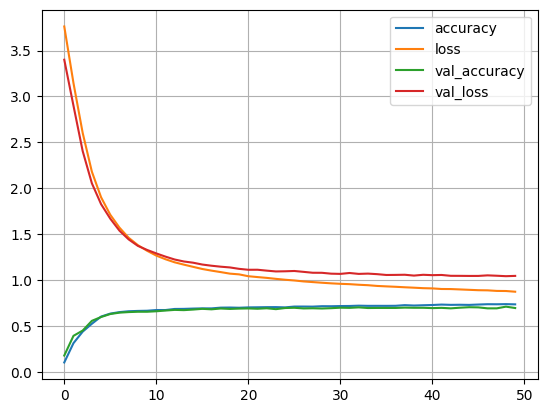

In [21]:
pd.DataFrame(history.history).plot(grid=True)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Matriz de confusión:
 [[40  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 2  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  2  0]]
Accuracy: 0.6972639011473963
Precision: 0.6805250534963543
Recall: 0.6972639011473963
F1-score: 0.6760798356238686


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


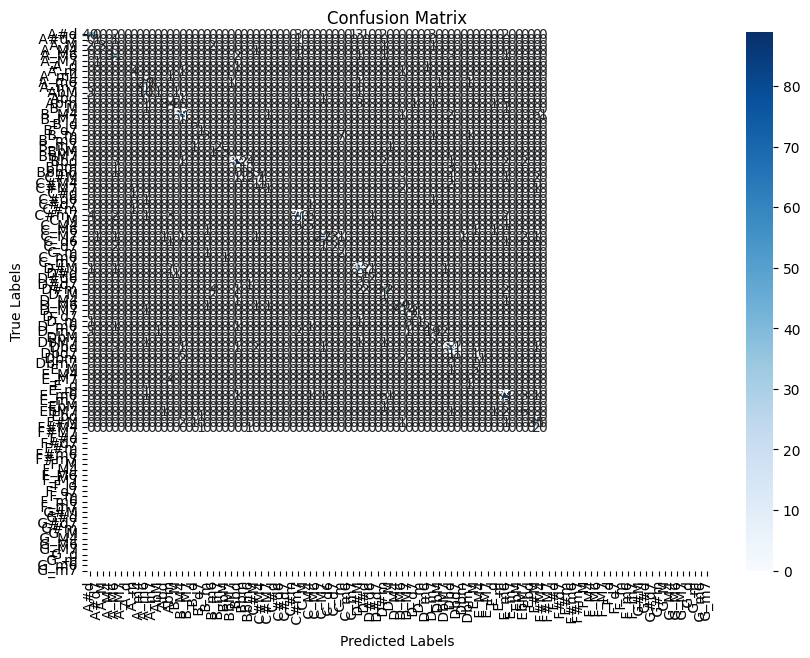

In [22]:
import numpy as np

# Predicciones
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, predicted_labels)
print("Matriz de confusión:\n", cm)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Distribución de errores
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor para la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



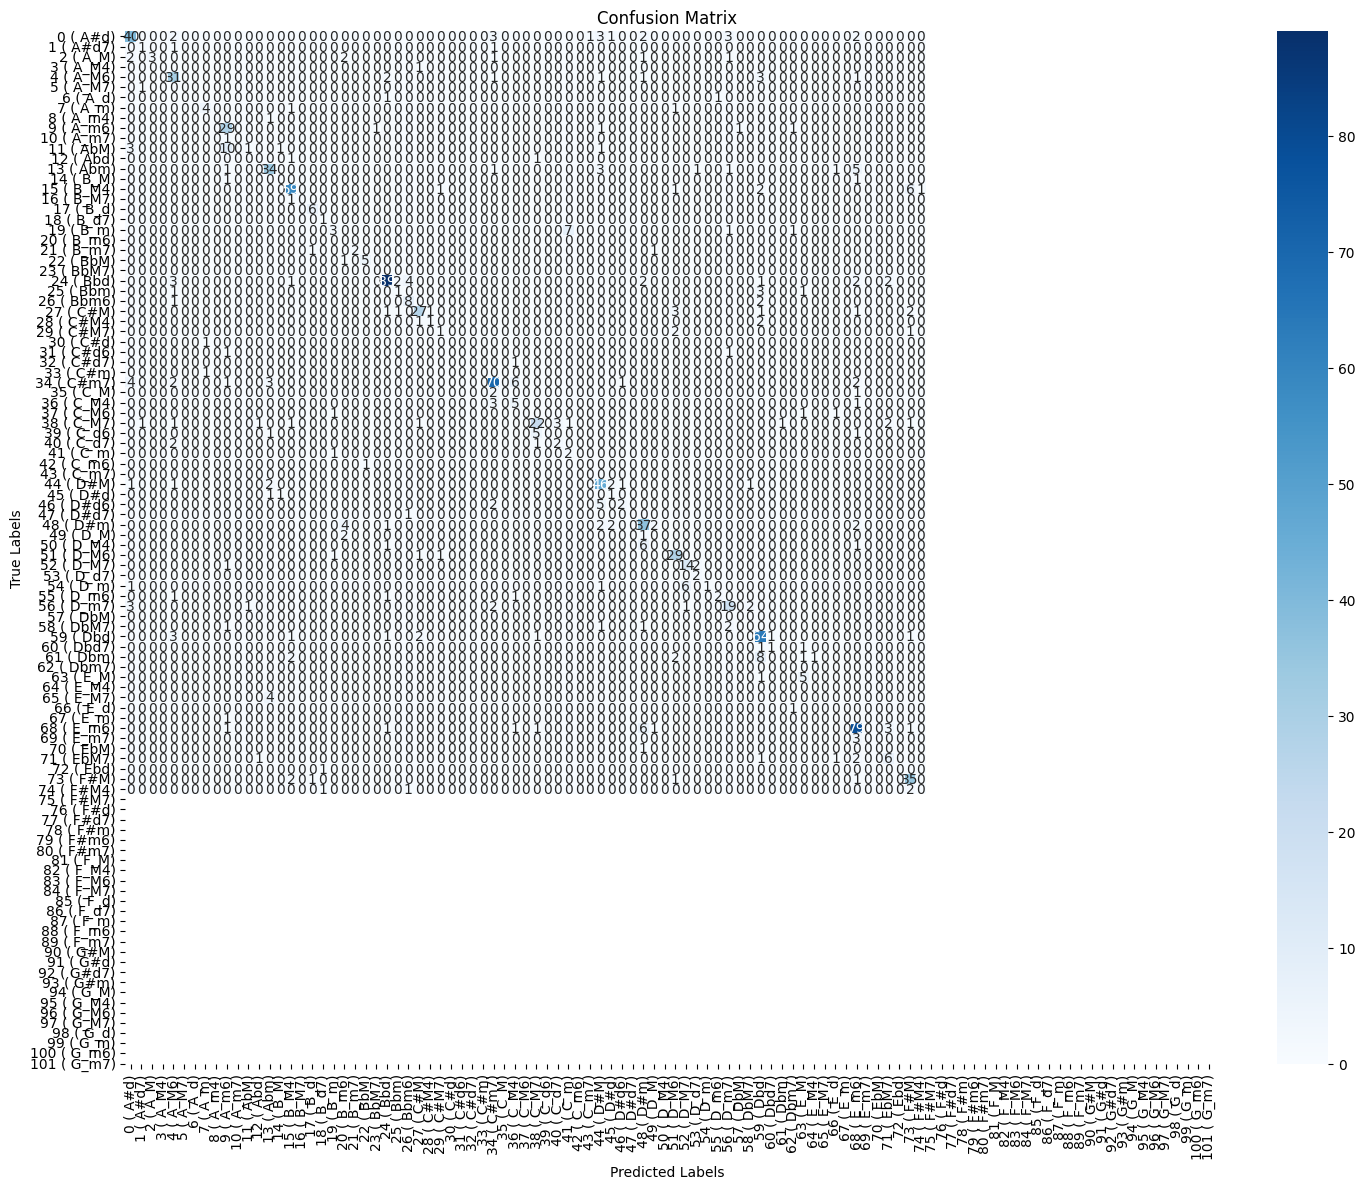

In [23]:
unique_labels = sorted(df_data['chord_label_encoded'].unique())

# Cree un mapa de las etiquetas codificadas a las notas originales
label_map = {code: note for code, note in zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_)}

# Cree etiquetas personalizadas que muestren tanto el código como la nota
custom_labels = [f"{code} ({label_map[code]})" for code in unique_labels]

# Mapa de calor para la matriz de confusión
plt.figure(figsize=(15, 12))  # Aumente el tamaño de la figura si es necesario
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=custom_labels,
            yticklabels=custom_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rote las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)   # Mantenga las etiquetas del eje y horizontales
plt.tight_layout()       # Ajuste el diseño para evitar cortar etiquetas
plt.show()

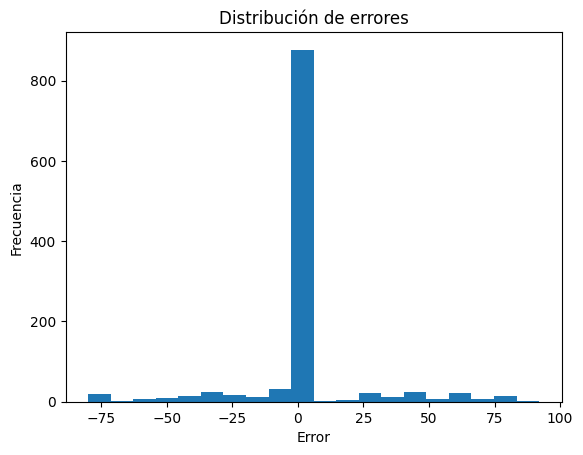

In [27]:
predictions_bin = (predicted_labels > 0.5).astype(int)
error = predicted_labels - y_test
plt.hist(error, bins=20)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores')
plt.show()
#ROC
from sklearn.metrics import roc_curve, auc


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


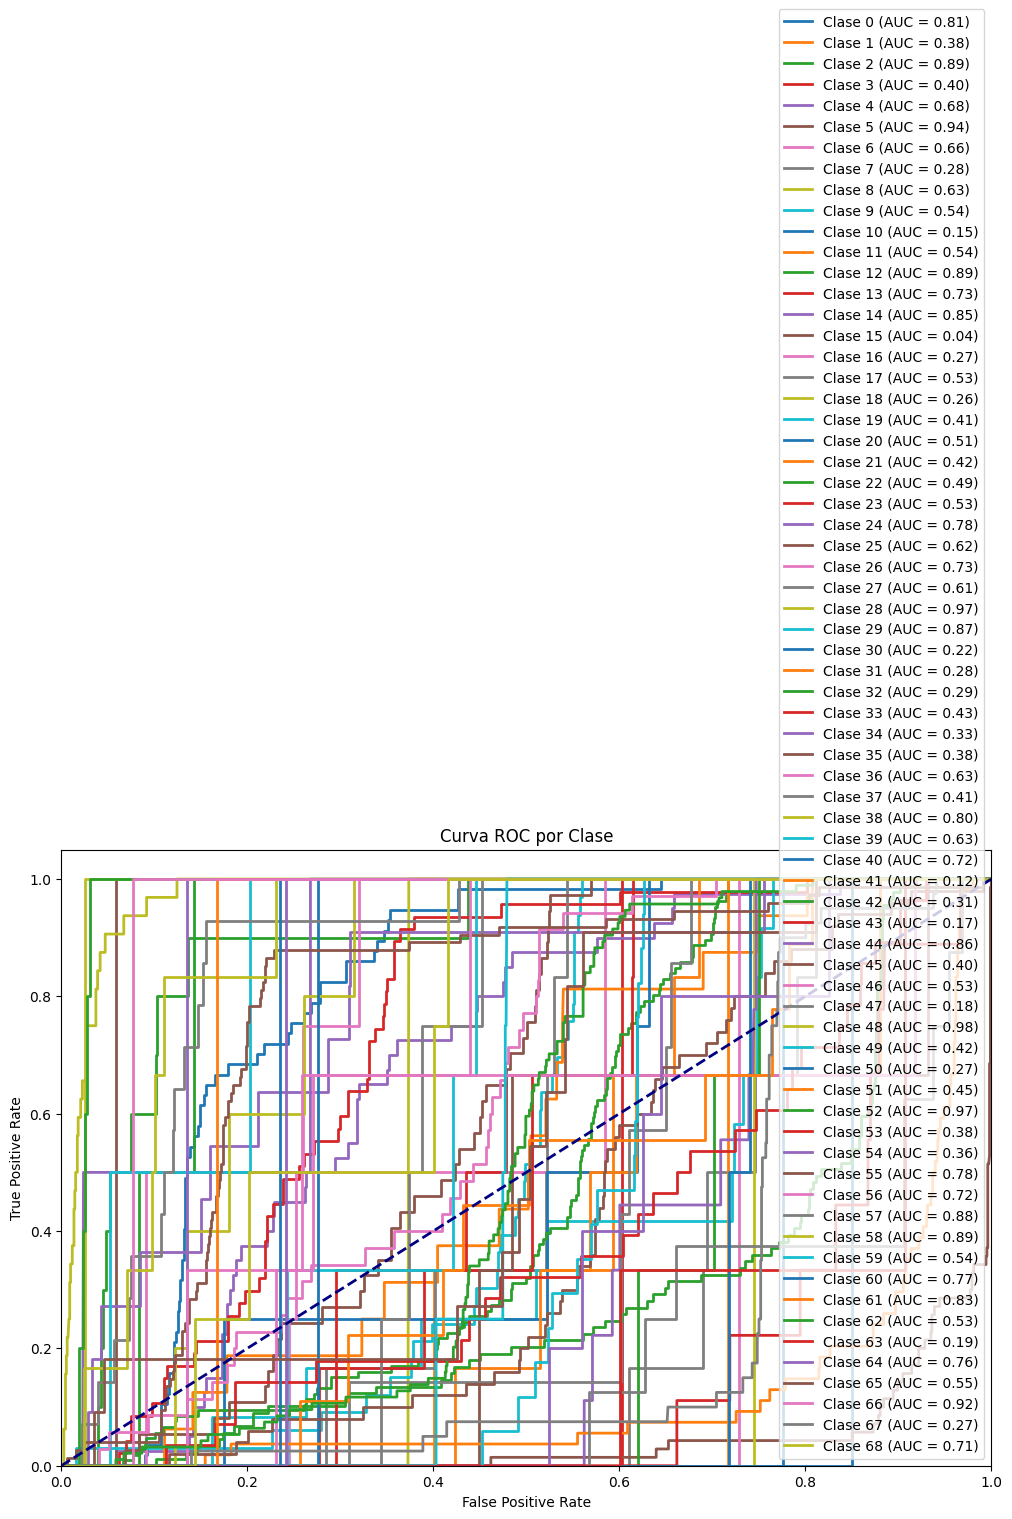

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
predicted_probs = model.predict(X_test)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 8))

# Cálculo del ROC y AUC para cada clase
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predicted_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# Línea diagonal para referencia de clasificación aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()


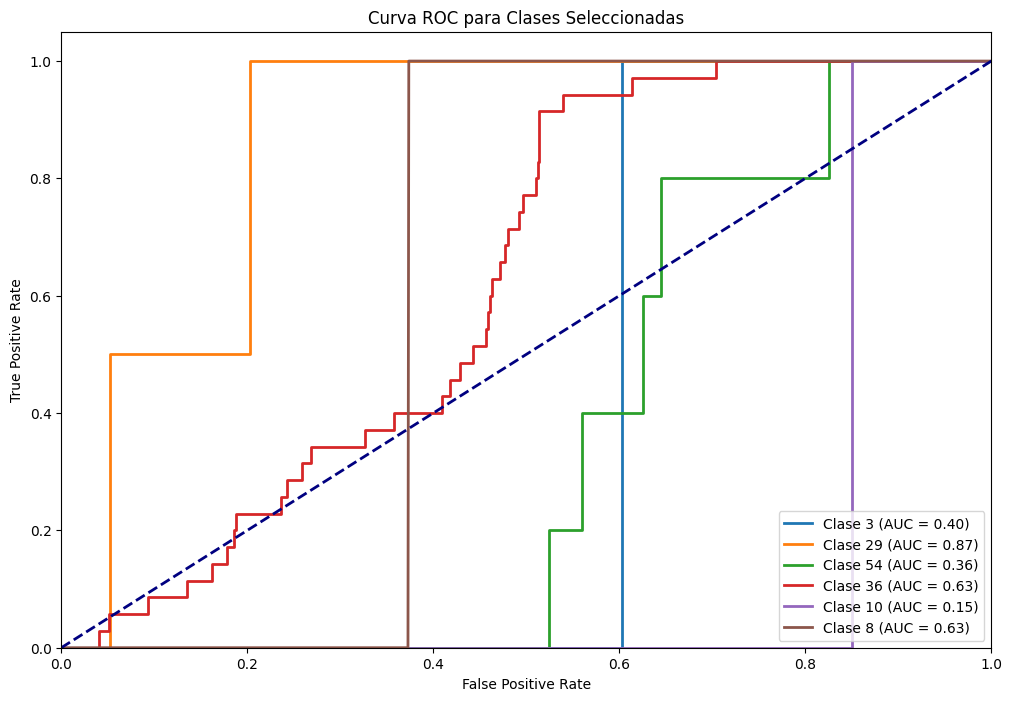

In [35]:
import random

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

n_classes = y_test_bin.shape[1]

# Seleccionar 6 clases aleatorias
random_classes = random.sample(range(n_classes), 6)

# Configuración para la gráfica
plt.figure(figsize=(12, 8))

# Cálculo del ROC y AUC para cada clase seleccionada
for i in random_classes:
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predicted_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# Línea diagonal para referencia de clasificación aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configuración final del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Clases Seleccionadas')
plt.legend(loc="lower right")
plt.show()
